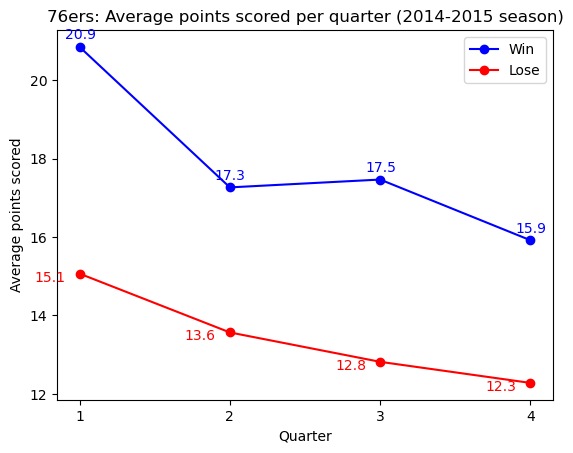

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sixers_games = pd.read_csv('phi_201415_shot_logs.csv')

# Filter the dataset for only 76ers games
sixers_games = sixers_games[sixers_games['MATCHUP'].str.contains('PHI')]

# Remove the 5th quarter
sixers_games = sixers_games[sixers_games['PERIOD'] < 5]

# Calculate the total points scored per quarter
quarter_points = sixers_games.groupby(['GAME_ID', 'PERIOD', 'W'])['PTS'].sum().reset_index()

# Calculate the average points scored per quarter when Sixers win or lose
avg_quarter_points = quarter_points.groupby(['W', 'PERIOD'])['PTS'].mean().reset_index()

# Plot the average points scored per quarter when Sixers win or lose
win_points = avg_quarter_points[avg_quarter_points['W']=='W']
lose_points = avg_quarter_points[avg_quarter_points['W']=='L']

plt.plot(win_points['PERIOD'], win_points['PTS'], 'bo-', label='Win')
plt.plot(lose_points['PERIOD'], lose_points['PTS'], 'ro-', label='Lose')

# Add data labels to the plot
offset = 0.2
for index, row in win_points.iterrows():
    plt.text(row['PERIOD']-0.1, row['PTS']+offset, round(row['PTS'], 1), color='blue', fontsize=10)
    
for index, row in lose_points.iterrows():
    plt.text(row['PERIOD']-0.3, row['PTS']-offset, round(row['PTS'], 1), color='red', fontsize=10)

plt.xlabel('Quarter')
plt.ylabel('Average points scored')
plt.title('76ers: Average points scored per quarter (2014-2015 season)')
plt.xticks(range(1, 5))
plt.legend()
plt.show()


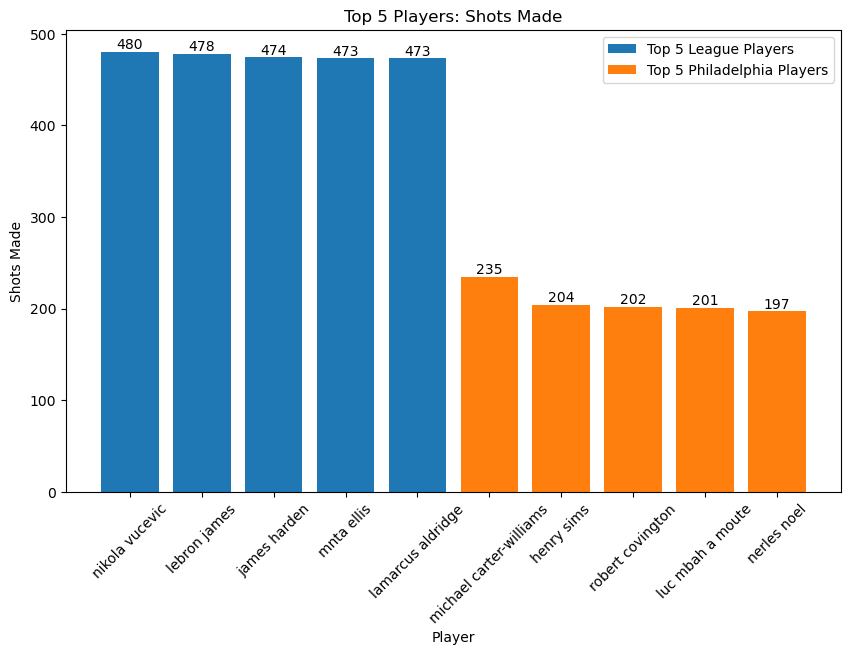

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the shot logs data
shot_logs = pd.read_csv('shot_logs.csv')

# Group by player and count the shots made for all players
all_players_shots = shot_logs[shot_logs['FGM'] == 1].groupby('player_name')['FGM'].count().reset_index()

# Sort all players by shots made in descending order and select top 5
top_players_all = all_players_shots.sort_values('FGM', ascending=False).head(5)

# Filter for Philadelphia players
phila_players = shot_logs[shot_logs['MATCHUP'].str.contains('PHI')]

# Group by player and count the shots made for Philadelphia players
phila_players_shots = phila_players[phila_players['FGM'] == 1].groupby('player_name')['FGM'].count().reset_index()

# Sort Philadelphia players by shots made in descending order and select top 5
top_players_phila = phila_players_shots.sort_values('FGM', ascending=False).head(5)

# Specify the additional five players
additional_players = ['Jeff Green', 'Shane Larkin', 'Joe Johnson', 'Kyle Lowry', 'Kyrie Irving']

# Filter for the additional players
additional_players_shots = shot_logs[shot_logs['player_name'].isin(additional_players) & (shot_logs['FGM'] == 1)].groupby('player_name')['FGM'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot the top 5 players in the league with data labels
plt.bar(top_players_all['player_name'], top_players_all['FGM'], label='Top 5 League Players')
for i, (x, y) in enumerate(zip(top_players_all['player_name'], top_players_all['FGM'])):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Plot the top 5 Philadelphia players with data labels
plt.bar(top_players_phila['player_name'], top_players_phila['FGM'], label='Top 5 Philadelphia Players')
for i, (x, y) in enumerate(zip(top_players_phila['player_name'], top_players_phila['FGM'])):
    plt.text(x, y, str(y), ha='center', va='bottom')


# Set the chart title and axis labels
plt.title('Top 5 Players: Shots Made')
plt.xlabel('Player')
plt.ylabel('Shots Made')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the chart
plt.show()


In [3]:
import pandas as pd

# Read the shot logs data
shot_logs = pd.read_csv('shot_logs.csv')

# Sum up the points scored by the players
total_points = shot_logs['PTS'].sum()

# Calculate the total number of players
total_players = shot_logs['player_name'].nunique()

# Calculate the average points earned by a player this season
average_points = total_points / total_players

# Print the average points
print("The average points earned by a player this season is:", average_points)


The average points earned by a player this season is: 454.5373665480427
